In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import time
import pandas as pd
import numpy as np

## Part 1: Implementation 
1. Implement Prim’s Algorithm as a function prim_mst(graph). 
2. Implement Kruskal’s Algorithm as a function Kruskal_mst(graph).
 
<b>Deliverable 1:</b> A well-documented source code package containing two separate files: one for 
implementing Prim’s algorithm and another for Kruskal’s algorithm. Each file should include a 
clearly  defined  function,  prim_mst(graph)  for  Prim’s  algorithm  and  Kruskal_mst(graph)  for 
Kruskal’s algorithm. These functions should take a graph as input and return its minimum spanning 
tree (MST). The code must be well-commented to explain the logic, and the graph input can be in 
the form of an adjacency list or matrix, as preferred.

In [2]:
#Kruskal Implementation
class Kruskal:
    def __init__(self, size):
        self.size = size  # Number of vertices
        self.edges = []  # For storing edges as (weight, u, v)
        self.vertex_data = [None] * size  # Store vertex names

    def add_edge(self, u, v, weight): # u - starting vertex, v - ending vertex, weight - weight of the edge
        if 0 <= u < self.size and 0 <= v < self.size:
            self.edges.append((weight, u, v))  # Add edge with weight
            
    def add_vertex_data(self, vertex, data): 
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data  # Add vertex data

    def find(self, parent, i):  # Find root of i
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def union(self, parent, rank, x, y):  # Union by rank
        xroot = self.find(parent, x)  # Find root of x - start_vertex of edges
        yroot = self.find(parent, y)  # Find root of y - end_vertex of edges
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    def algorithm(self):
        result = []  # MST
        i = 0  # edge counter
        mst_weight = 0 # Variable to store the total weight of the MST
        self.edges = sorted(self.edges, key=lambda item: item[0])  # Sort edges by weight

        parent, rank = [], []  # Parent and rank of each vertex

        for node in range(self.size):  # Initialize parent and rank
            parent.append(node)  # parent of node
            rank.append(0) 

        while i < len(self.edges): 
            weight, u, v = self.edges[i]
            i += 1
            
            x = self.find(parent, u)  # Find root of u
            y = self.find(parent, v)  # Find root of v
            if x!= y:
                result.append((u, v, weight))
                self.union(parent, rank, x, y)
                mst_weight += weight

        return result, mst_weight

    def output(self, result, mst_weight):
        # Output MST
        print("Kruskal's Algorithm MST")
        for u, v, weight in result:
            print(f"{self.vertex_data[u]}-{self.vertex_data[v]} \t{weight}")

        # Output adjacency matrix for the original graph
        print("Adjacency matrix for the original graph:")
        adj_matrix = [[0] * self.size for _ in range(self.size)]  # Adjacency matrix of the graph
        for weight, u, v in self.edges:
            adj_matrix[u][v] = weight
            adj_matrix[v][u] = weight  # For undirected graph
        for row in adj_matrix:
            print(row)

        # Output adjacency lists for the original graph
        print("Adjacency lists for the original graph:")
        for i in range(self.size):
            adjacent_vertices = [v for _, v, _ in self.edges if v != i]
            print(f"Vertex {self.vertex_data[i]}: {', '.join([self.vertex_data[v] for v in adjacent_vertices])}")    

        print(f"Total weight of MST: {mst_weight}")    

        # Create a NetworkX graph for the MST
        G_mst = nx.Graph()
        for u, v, weight in result:
            G_mst.add_edge(self.vertex_data[u], self.vertex_data[v], weight=weight)

        # Create a NetworkX graph for the original graph
        G_original = nx.Graph()
        for weight, u, v in self.edges:
            G_original.add_edge(self.vertex_data[u], self.vertex_data[v], weight=weight)  # Add the edge to the graph

        # Draw the original graph using matplotlib
        pos_original = nx.spring_layout(G_original)  # positions for all nodes
        nx.draw_networkx(G_original, pos_original, with_labels=True, node_color='lightblue', edge_color='gray')  # draw nodes and edges
        labels_original = nx.get_edge_attributes(G_original, 'weight')  # get the edge labels
        nx.draw_networkx_edge_labels(G_original, pos_original, edge_labels=labels_original)  # draw edge labels

        plt.title("Original Graph")
        plt.figure()

        # Draw the MST using matplotlib
        pos_mst = nx.spring_layout(G_mst)
        nx.draw_networkx(G_mst, pos_mst, with_labels=True, node_color='lightblue', edge_color='red')
        labels_mst = nx.get_edge_attributes(G_mst, 'weight')
        nx.draw_networkx_edge_labels(G_mst, pos_mst, edge_labels=labels_mst)
        
        plt.title("MST")
        plt.figure()

In [3]:
#Prims Implementation
class Prims:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]  # Adjacency matrix of the graph
        self.size = size  # Number of vertices
        self.edges = []  # List to store the edges of the graph
        self.vertex_data = [''] * size  # Stores the data of the vertices

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight  
            self.adj_matrix[v][u] = weight  # For undirected graph
            self.edges.append((weight, u, v)) # Add edge with weight

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data  # Add the data to the vertex

    def algorithm(self):
        in_mst = [False] * self.size  # Keeps track of visited vertices
        key_values = [float('inf')] * self.size  # Keeps track of the minimum weight of the edge
        parents = [-1] * self.size # Keeps track of the parent of the vertex

        key_values[0] = 0  # Starting vertex
        mst_weight = 0  # Stores the weight of the MST
        mst_edges = []  # List to store the edges of the MST (u - starting vertex,v - end vertex, weight)
        for _ in range(self.size):
            u = min((v for v in range(self.size) if not in_mst[v]), key=lambda v: key_values[v])

            in_mst[u] = True  # Mark the vertex as visited

            if parents[u]!= -1:  # Skip printing for the first vertex since it has no parent
                mst_edges.append((self.vertex_data[parents[u]], self.vertex_data[u], self.adj_matrix[u][parents[u]]))
                mst_weight += self.adj_matrix[u][parents[u]]  # Add the weight of the edge to the MST
            for v in range(self.size):  # Update the key values and parents of the adjacent vertices of the current vertex
                if 0 < self.adj_matrix[u][v] < key_values[v] and not in_mst[v]:
                    key_values[v] = self.adj_matrix[u][v]
                    parents[v] = u
                    
        return mst_edges, mst_weight

    def output(self, mst_edges, mst_weight):
        # Output the MST
        print("Prim's Algorithm MST:")
        for edge in mst_edges:
            print(f"{edge[0]}-{edge[1]} \t{edge[2]}")

        # Output adjacency matrix for the original graph
        print("Adjacency matrix for the original graph:")
        for row in self.adj_matrix:
            print(row)

        # Output adjacency lists for the original graph
        print("Adjacency lists for the original graph:")
        for i in range(self.size):
            adjacent_vertices = [j for j in range(self.size) if self.adj_matrix[i][j] > 0]
            print(f"Vertex {self.vertex_data[i]}: {', '.join([self.vertex_data[v] for v in adjacent_vertices])}")    

        print(f"Total weight of MST: {mst_weight}")    

        # Create a NetworkX graph for the original graph
        G_original = nx.Graph()
        for u in range(self.size):
            for v in range(u+1, self.size):
                if self.adj_matrix[u][v] > 0:
                    G_original.add_edge(self.vertex_data[u], self.vertex_data[v], weight=self.adj_matrix[u][v])

        # Create a NetworkX graph for the MST
        G_mst = nx.Graph()
        for edge in mst_edges:
            G_mst.add_edge(edge[0], edge[1], weight=edge[2])

        # Draw the original graph
        pos = nx.spring_layout(G_original)
        nx.draw_networkx(G_original, pos, with_labels=True, node_color='lightblue', edge_color='gray')
        labels = nx.get_edge_attributes(G_original, 'weight')
        nx.draw_networkx_edge_labels(G_original, pos, edge_labels=labels)

        plt.title("Original Graph")
        plt.figure()

        # Draw the MST graph
        pos = nx.spring_layout(G_mst)
        nx.draw_networkx(G_mst, pos, with_labels=True, node_color='lightblue', edge_color='red')
        labels = nx.get_edge_attributes(G_mst, 'weight')
        nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=labels)
        
        plt.title("MST")
        plt.figure()

Prim's Algorithm MST:
A-C 	1
A-F 	1
F-D 	9
D-B 	2
D-E 	4
Adjacency matrix for the original graph:
[0, 18, 1, 17, 10, 1]
[18, 0, 0, 2, 4, 20]
[1, 0, 0, 12, 18, 4]
[17, 2, 12, 0, 4, 9]
[10, 4, 18, 4, 0, 12]
[1, 20, 4, 9, 12, 0]
Adjacency lists for the original graph:
Vertex A: B, C, D, E, F
Vertex B: A, D, E, F
Vertex C: A, D, E, F
Vertex D: A, B, C, E, F
Vertex E: A, B, C, D, F
Vertex F: A, B, C, D, E
Total weight of MST: 17


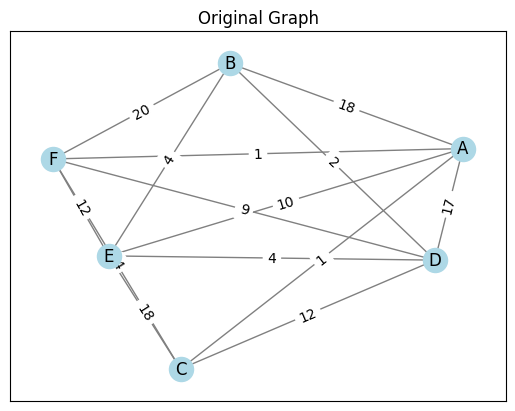

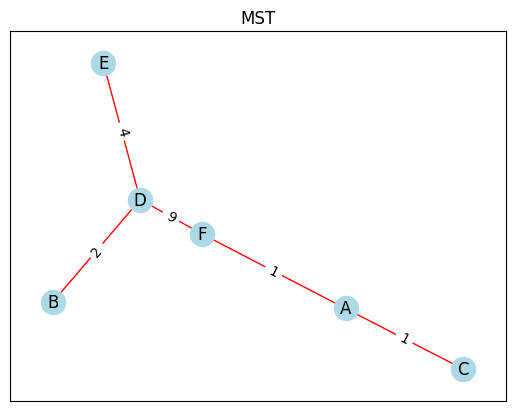

<Figure size 640x480 with 0 Axes>

In [4]:
#Run test
def main():
    choose = input("Prims or Kruskal?: ")
    if choose == "Prims":
        num_vertices = int(input("Enter the number of vertices: "))
        g = Prims(num_vertices)
    elif choose == "Kruskal":
        num_vertices = int(input("Enter the number of vertices: "))
        g = Kruskal(num_vertices)
    else:
        main()

    # Generate the graph
    for i in range(num_vertices):
        vertex_name = chr(i + 97).upper()
        g.add_vertex_data(i, vertex_name)

    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            weight = int(random.randint(0,20))
            if weight != 0:
                g.add_edge(i, j, weight)    
    
    # for i in range(num_vertices):
    #     name = input(f"Enter the name for vertex {i}: ")
    #     g.add_vertex_data(i, name)

    # for i in range(num_vertices):
    #     for j in range(i + 1, num_vertices):
    #         length = int(input(f"Enter the length of the edge between vertices {i} and {j}: "))
    #         if length != 0:
    #             g.add_edge(i, j, length)
    #         else:
    #             continue

    mst, total_weight = g.algorithm()
    return g.output(mst, total_weight)

main()

## Part 2: Testing and Validation 
1. Create at least three different graphs to test your algorithms. These should include:
- A sparse graph with 10-15 nodes.
- A dense graph with 10-15 nodes.
- A graph with varying edge weights, including negative weights, if your implementation allows. 
2. Record and analyze the output of each algorithm on these graphs. 

- Run both algorithms on each of the graphs. 
- Record the output MSTs and their total weights.
 
<b>Deliverable 2:</b> Provide a comprehensive testing document that includes detailed descriptions and 
results of at least three different graph test cases used to validate both algorithms. These graphs 
should represent a variety of types, including a sparse graph, a dense graph, and a graph with varied 
edge weights. For each test case, the document should clearly present the input graph, the MSTs 
obtained from both Prim’s and Kruskal’s algorithms, and a summary of the total weight of each 
MST. This will demonstrate the correctness and functionality of your implementations.

https://www.baeldung.com/cs/graphs-sparse-vs-dense

<img src="https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-d9bce929eb79a6119ecd30d53af622ee_l3.svg" style="width:500px;height:228px;background-color:white">

With $|V|$: The number of vertices, 
     $|E|$: The number of edges,  
     $Max_U(V)$: The maximum number of edges in the graph

In [5]:
def get_density(V, E):
    # Density of a graph
    density = 2*E/(V*(V-1)) #Unit: No. E/ No. nodes
    return density

Prim's Algorithm MST:
A-G 	11
G-C 	5
G-J 	6
J-B 	2
J-H 	11
G-I 	11
I-D 	5
D-F 	10
Adjacency matrix for the original graph:
[0, 0, 0, 0, 0, 0, 11, 0, 0, 0]
[0, 0, 19, 0, 0, 0, 0, 0, 0, 2]
[0, 19, 0, 0, 0, 0, 5, 0, 0, 0]
[0, 0, 0, 0, 0, 10, 0, 0, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 10, 0, 0, 0, 0, 0, 0]
[11, 0, 5, 0, 0, 0, 0, 0, 11, 6]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 11]
[0, 0, 0, 5, 0, 0, 11, 0, 0, 0]
[0, 2, 0, 0, 0, 0, 6, 11, 0, 0]
Adjacency lists for the original graph:
Vertex A: G
Vertex B: C, J
Vertex C: B, G
Vertex D: F, I
Vertex E: 
Vertex F: D
Vertex G: A, C, I, J
Vertex H: J
Vertex I: D, G
Vertex J: B, G, H
Total weight of MST: 61


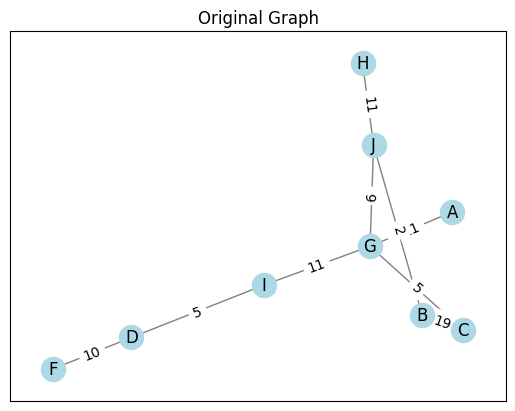

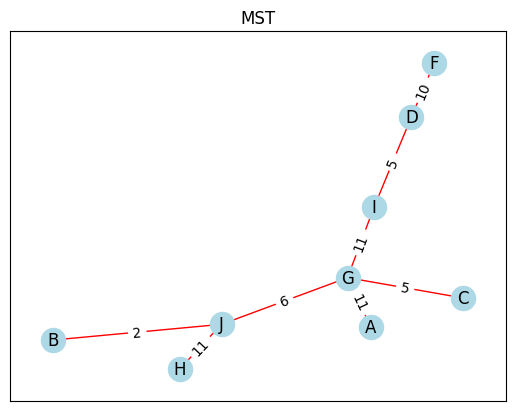

<Figure size 640x480 with 0 Axes>

In [6]:
def generate_dense_sparse():
    choose = input("Prims or Kruskal?: ")
    if choose == "Prims":
        num_vertices = int(input("Enter the number of vertices: ")) #int(random.randint(10,15))
        g = Prims(num_vertices)
    elif choose == "Kruskal":
        num_vertices = int(input("Enter the number of vertices: ")) #int(random.randint(10,15))
        g = Kruskal(num_vertices)
    else:
        generate_dense_sparse()

    # Generate the graph
    density = float(input("Enter the density (between 0 and 1): "))
    num_edges = int(density * (num_vertices * (num_vertices - 1)) / 2)  # Calculate the number of edges based on density

    for i in range(num_vertices):  # Add vertices
        vertex_name = chr(i + 97).upper()
        g.add_vertex_data(i, vertex_name)

    if density < 0.5:  # Sparse graph
        edge_count = 0
        while edge_count < num_edges: 
            u = random.randint(0, num_vertices - 1)
            v = random.randint(0, num_vertices - 1)
            if u != v and g.edges.count((0, u, v)) == 0:  # Check if the edge is already present
                weight = random.randint(1, 20)
                g.add_edge(u, v, weight)
                edge_count += 1
    else:  # Dense graph
        all_edges = [(u, v) for u in range(num_vertices) for v in range(u + 1, num_vertices)]  # Generate all possible edges
        random.shuffle(all_edges)
        selected_edges = all_edges[:num_edges]  # Select the required number of edges
        for u, v in selected_edges:  # Add the edges
            weight = random.randint(1, 20)
            g.add_edge(u, v, weight)

    mst, total_weight = g.algorithm()
    return g.output(mst, total_weight)

generate_dense_sparse()

# Part 3: Analysis 
- Analyze the performance of both algorithms on each graph. 
- Discuss the time complexity in the best, average, and worst-case scenarios for each algorithm.
 
<b>Deliverable 3:</b> The third part requires a detailed analytical report. This report should include a 
thorough performance analysis comparing Prim’s and Kruskal’s algorithms, focusing on time 
complexity in various scenarios (e.g., best, average, and worst-case). Additionally, the report 
should feature a real-world application case study, demonstrating the practical use of MSTs and 
arguing which of the two algorithms would be more suitable for the specific scenario. The report 
should conclude with a comparative discussion of the two algorithms, drawing insights from both 
the theoretical aspects and the testing results.

Prim's Algorithm MST:
Adjacency matrix for the original graph:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Adjacency lists for the original graph:
Vertex A: 
Vertex B: 
Vertex C: 
Vertex D: 
Vertex E: 
Vertex F: 
Vertex G: 
Vertex H: 
Vertex I: 
Vertex J: 
Total weight of MST: 0
Prim's Algorithm MST:
Adjacency matrix for the original graph:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Adjacency lists for the original graph:
Vertex A: 
Vertex B: 
Vertex C: 
Vertex D

C:\Users\DELL\AppData\Local\Temp\ipykernel_11168\3814277640.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Prim's Algorithm MST:
C-H 	1
C-F 	10
H-I 	18
Adjacency matrix for the original graph:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 10, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 10, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 18, 0]
[0, 0, 0, 0, 0, 0, 0, 18, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Adjacency lists for the original graph:
Vertex A: 
Vertex B: 
Vertex C: F, H
Vertex D: 
Vertex E: 
Vertex F: C
Vertex G: 
Vertex H: C, I
Vertex I: H
Vertex J: 
Total weight of MST: 29
Prim's Algorithm MST:
B-G 	7
G-C 	2
G-D 	2
G-H 	3
E-J 	8
Adjacency matrix for the original graph:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 7, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 7, 2, 2, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 3, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 8, 0, 0, 0, 0, 0]
Adjacenc

KeyboardInterrupt: 

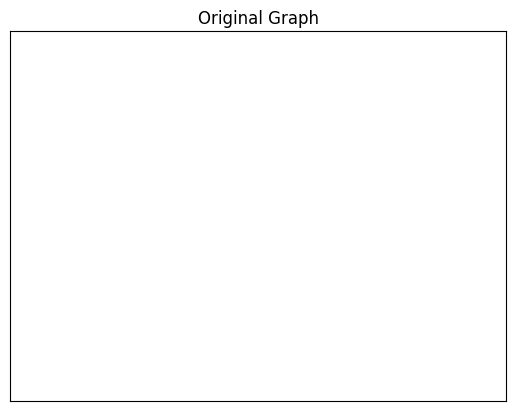

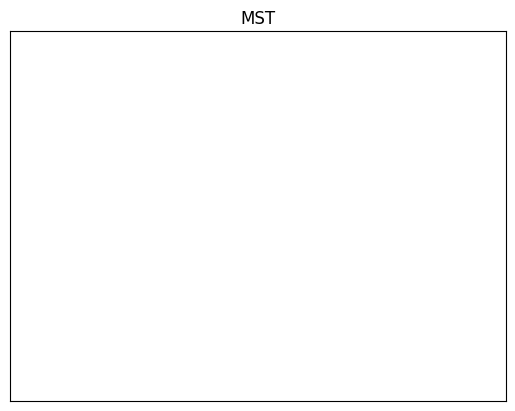

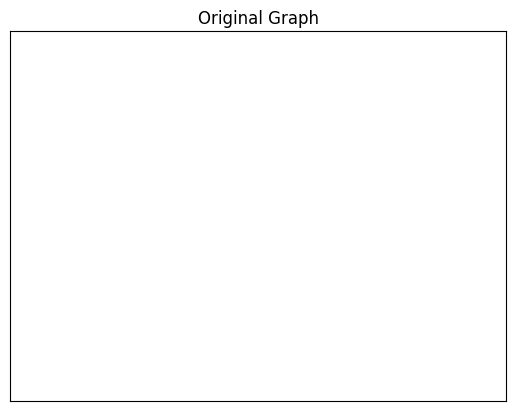

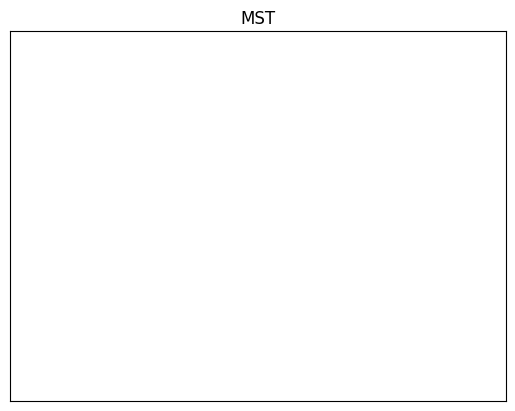

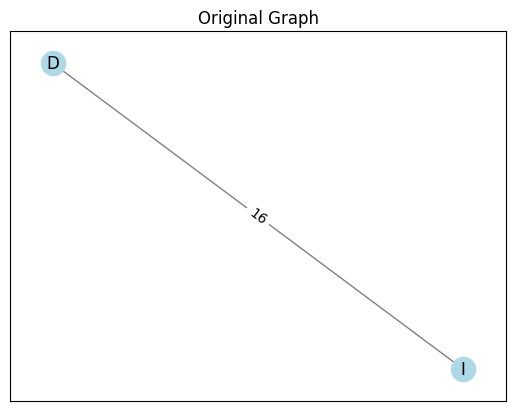

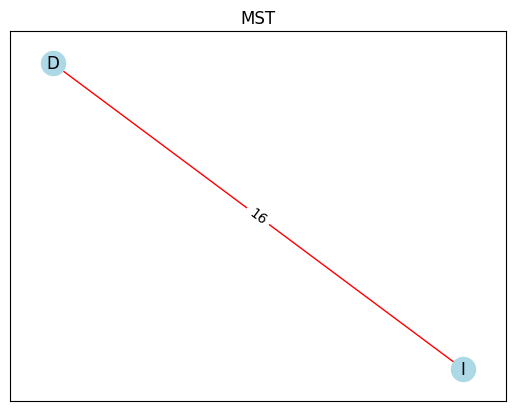

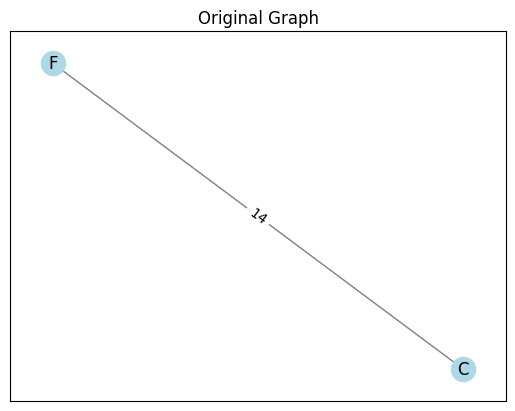

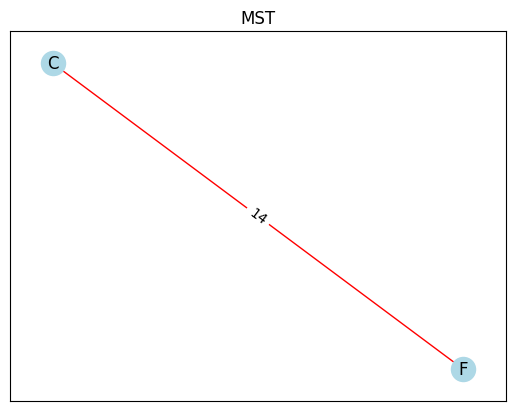

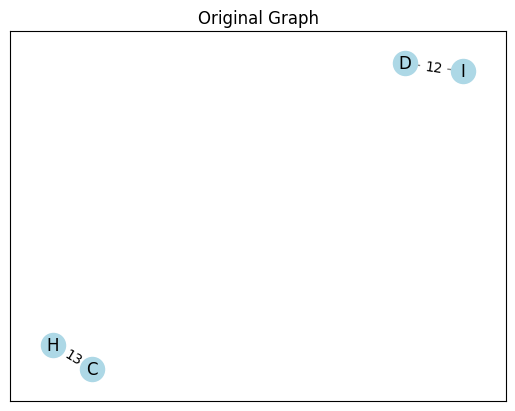

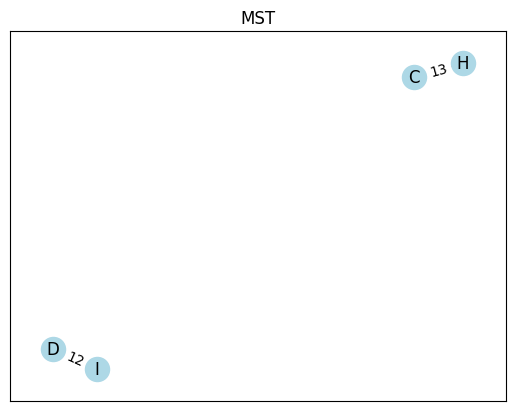

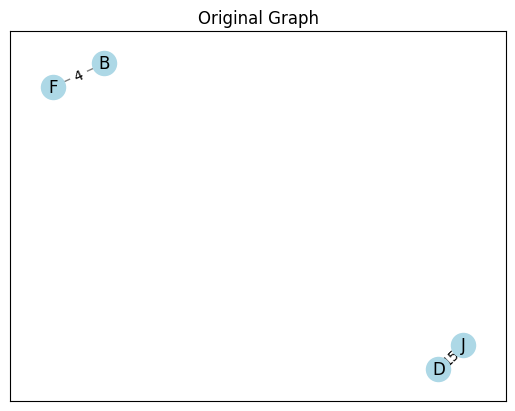

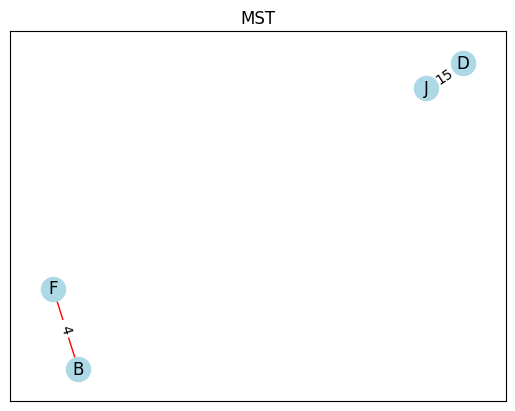

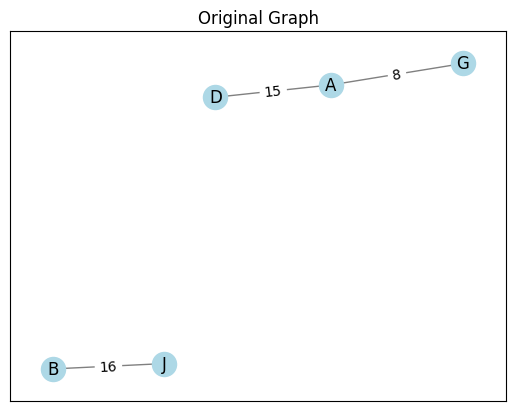

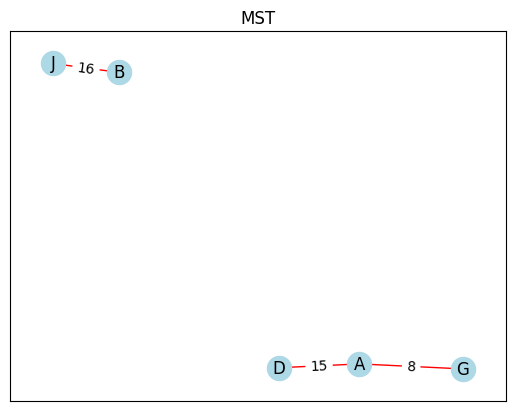

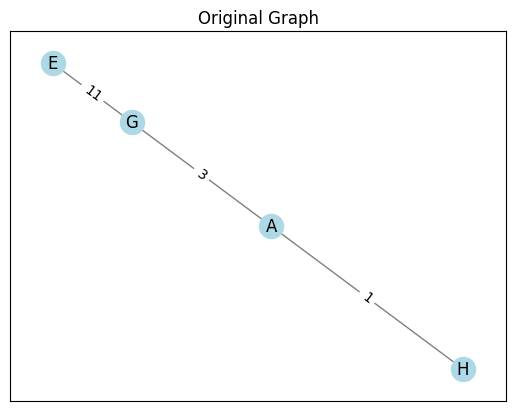

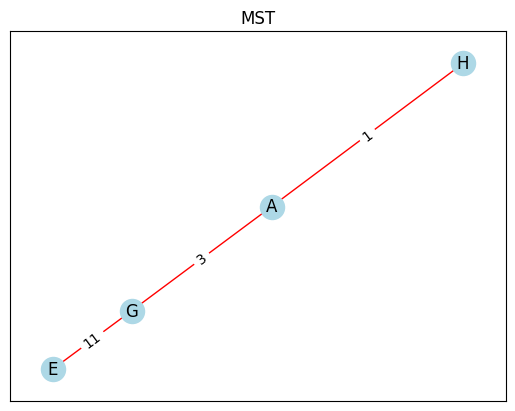

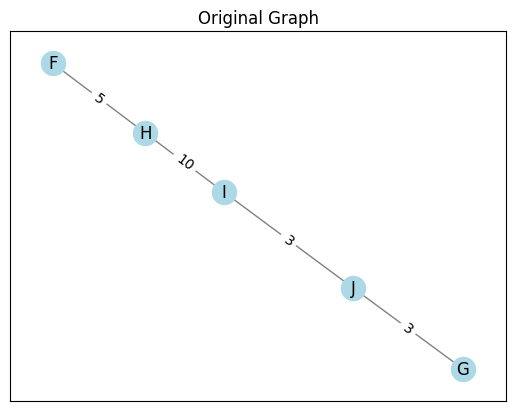

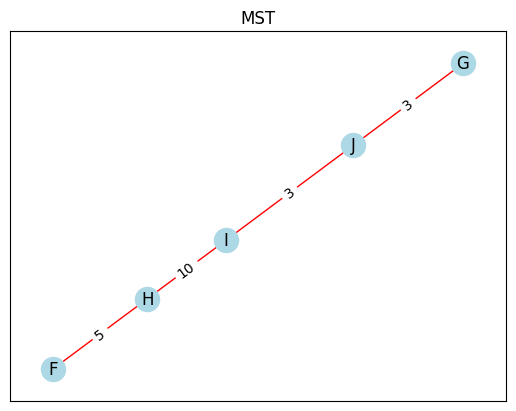

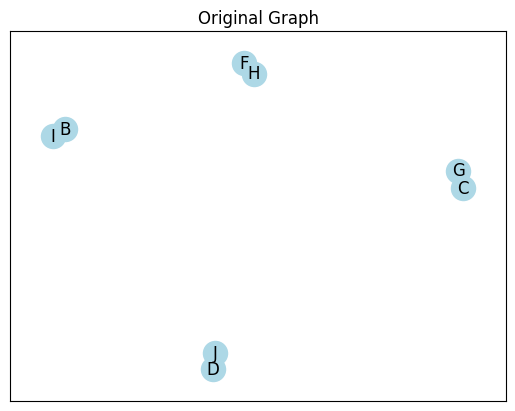

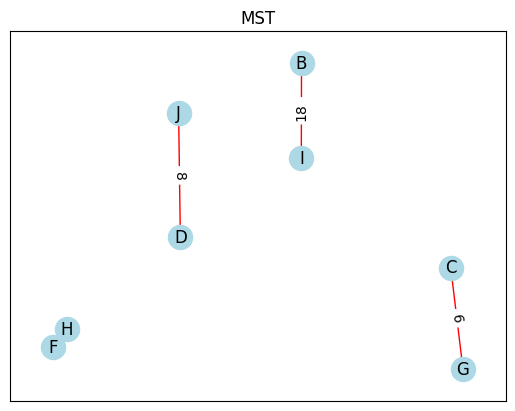

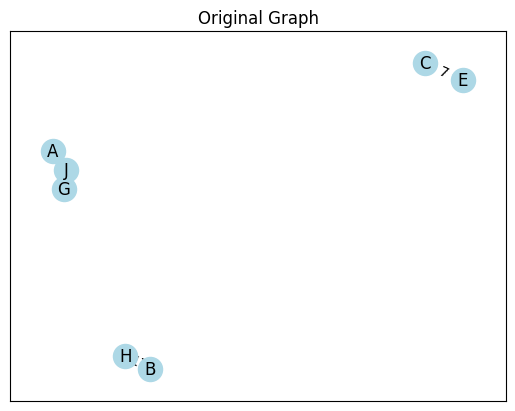

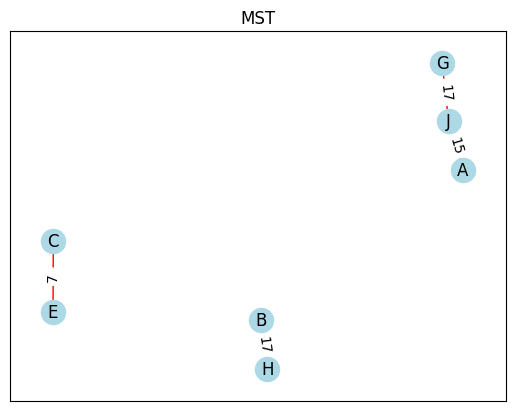

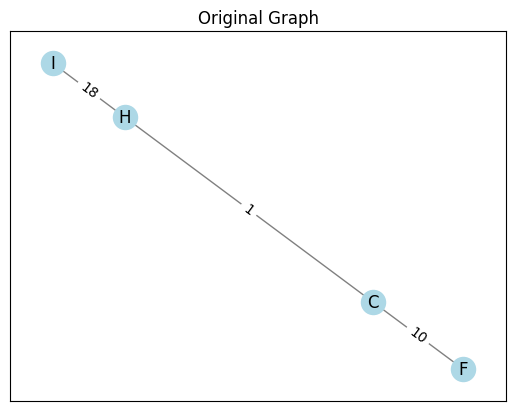

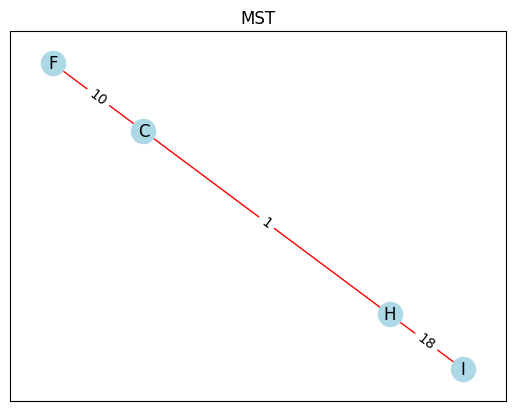

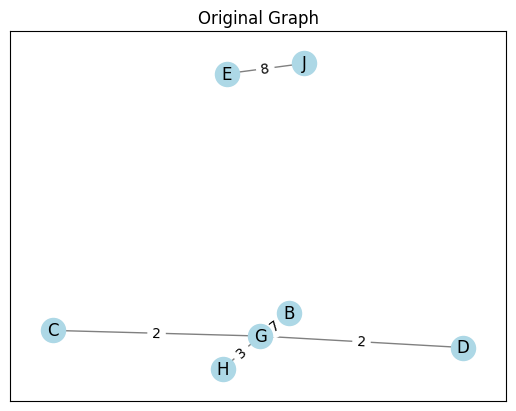

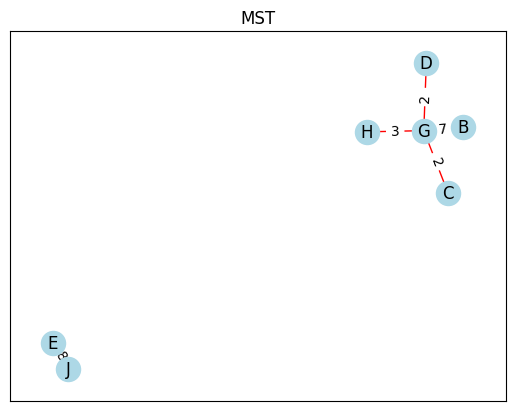

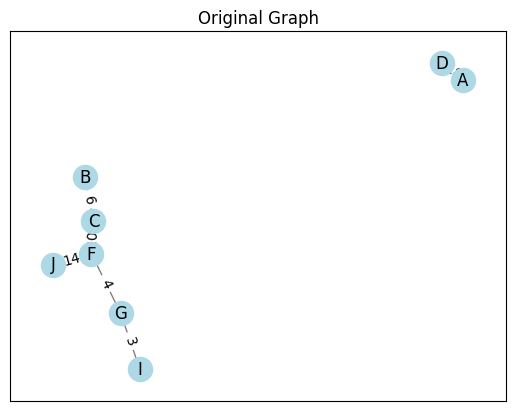

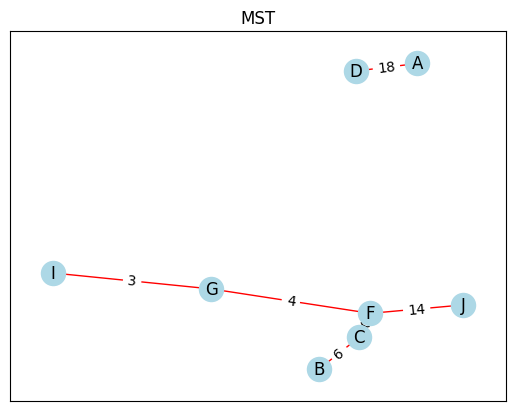

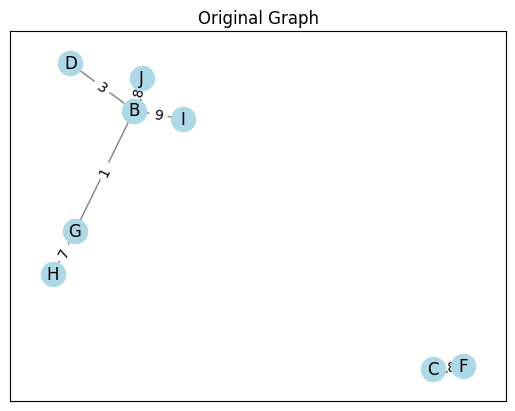

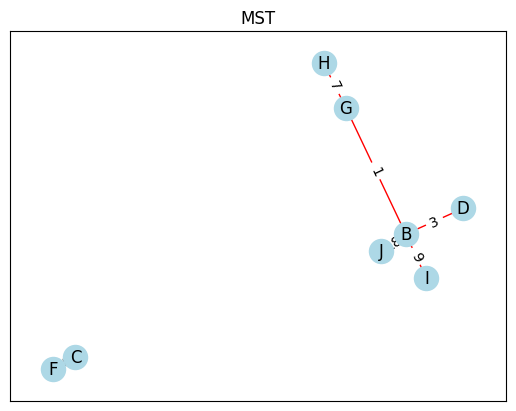

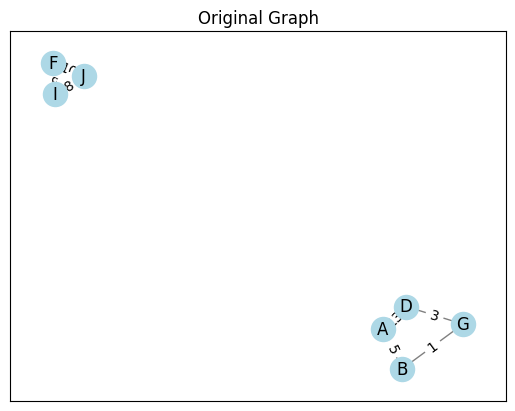

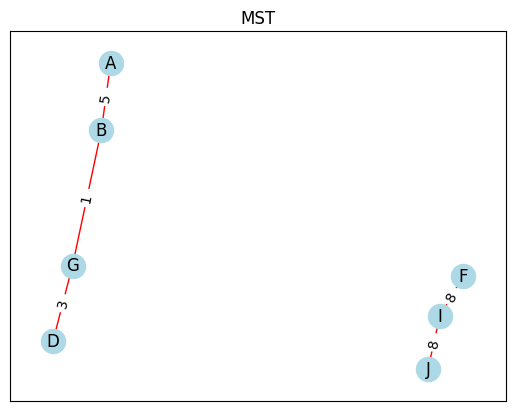

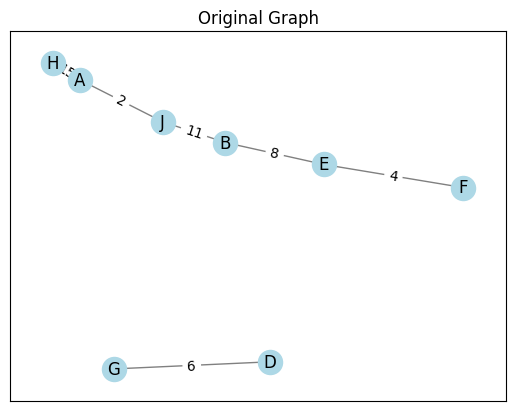

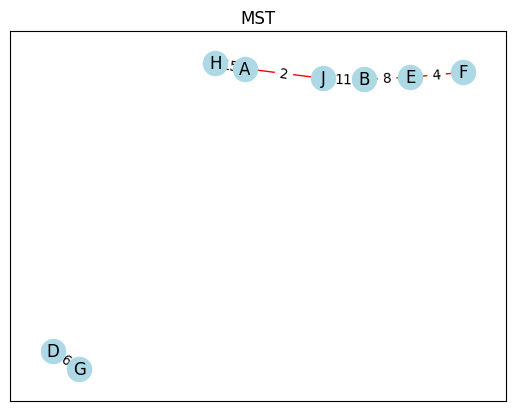

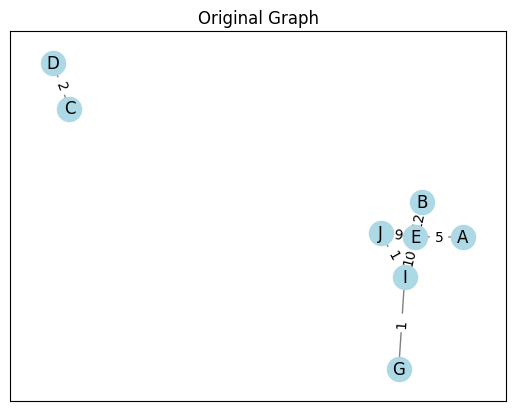

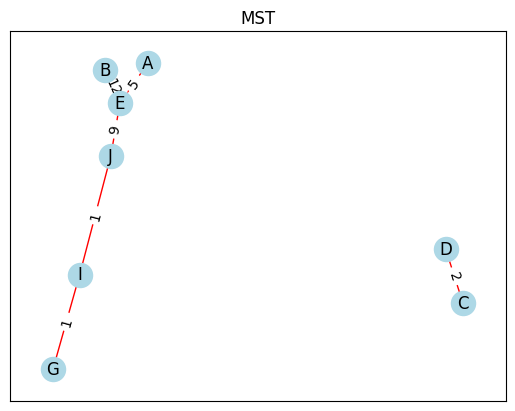

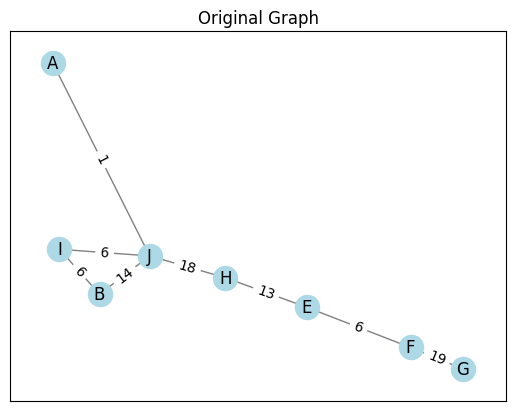

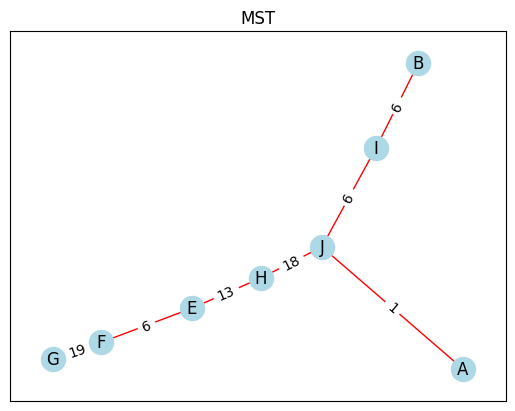

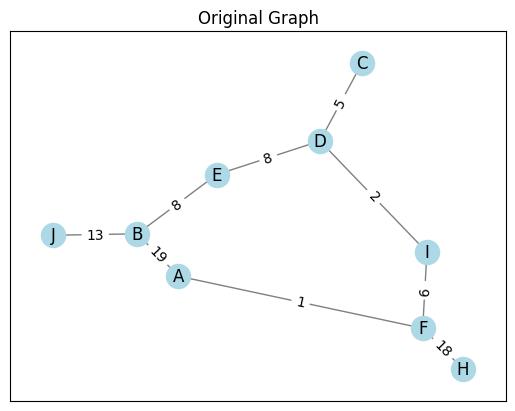

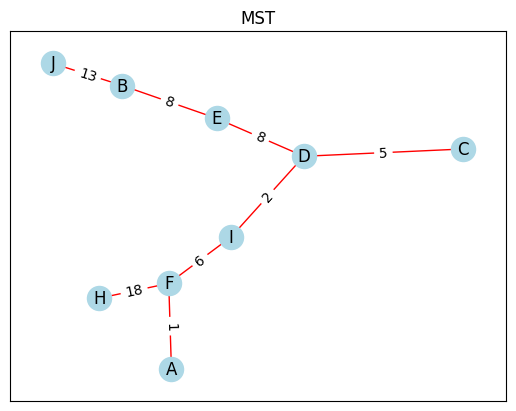

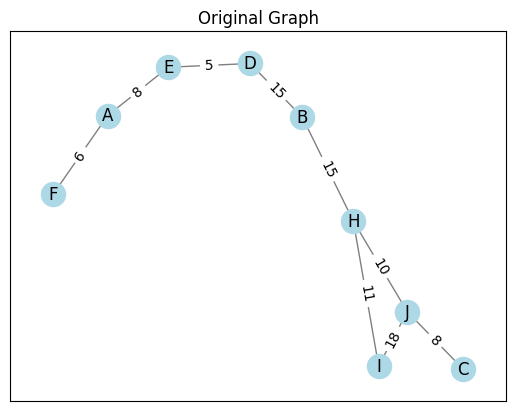

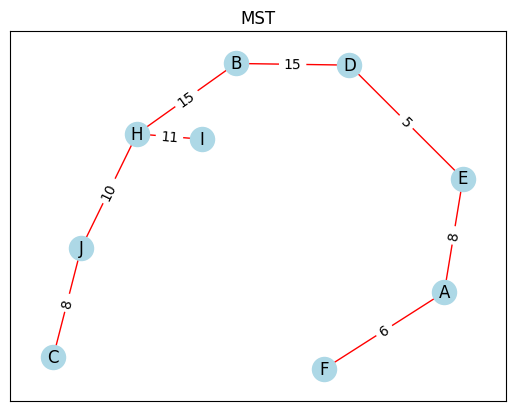

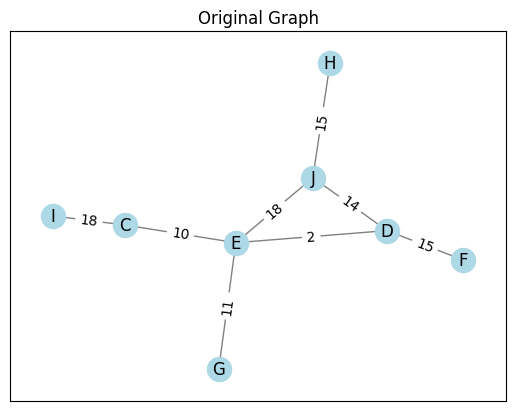

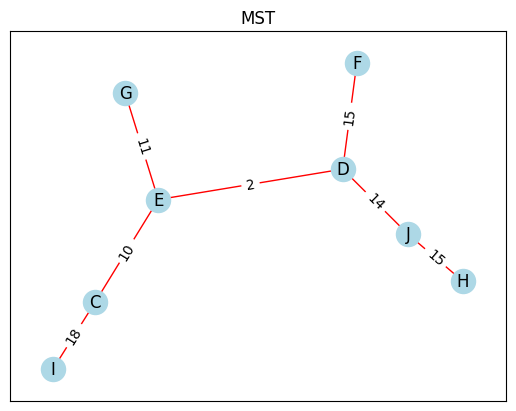

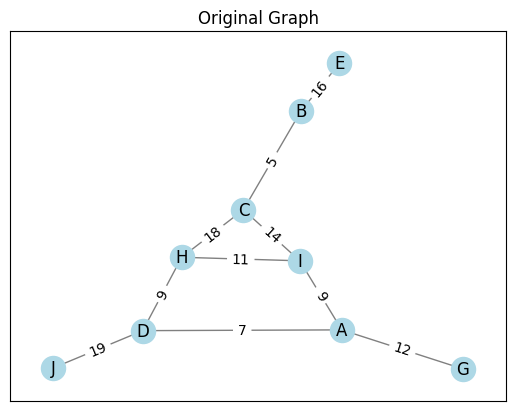

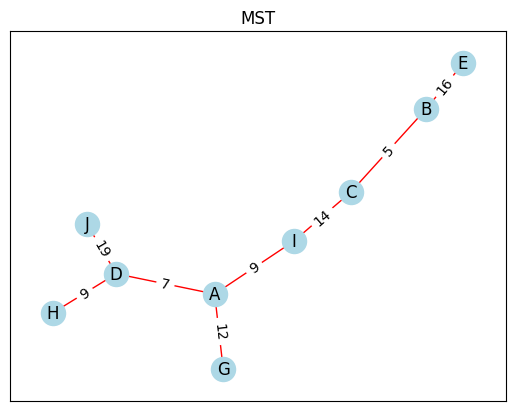

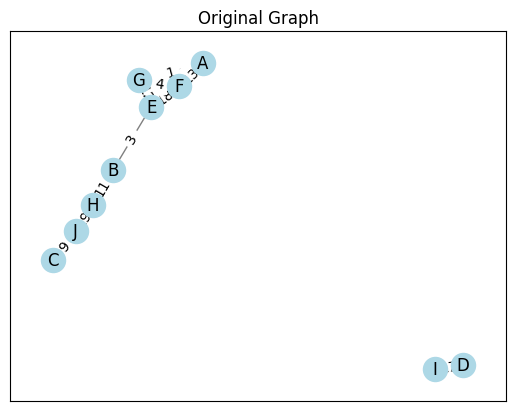

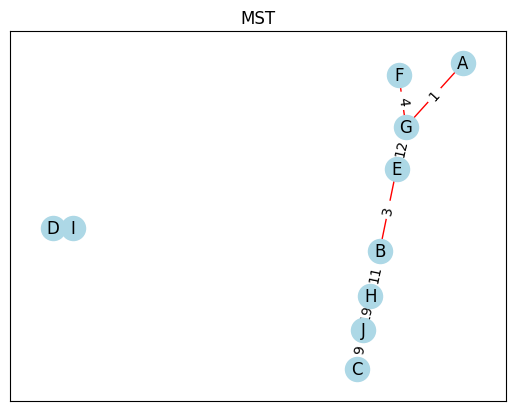

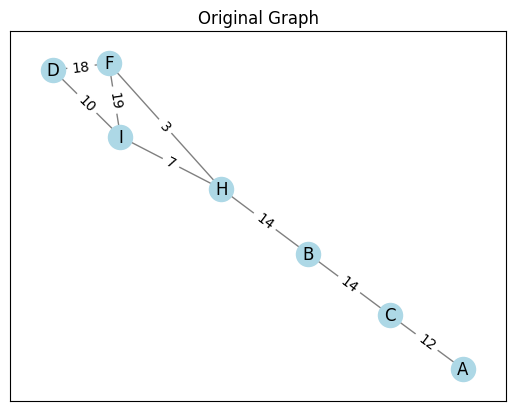

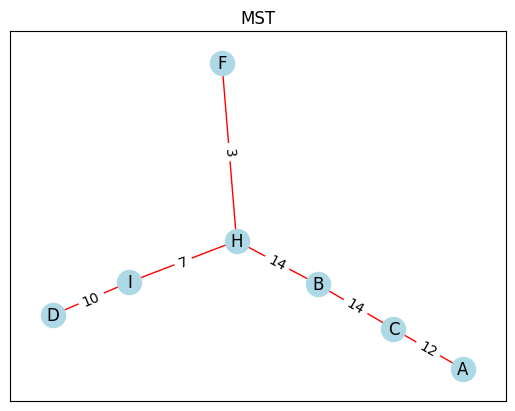

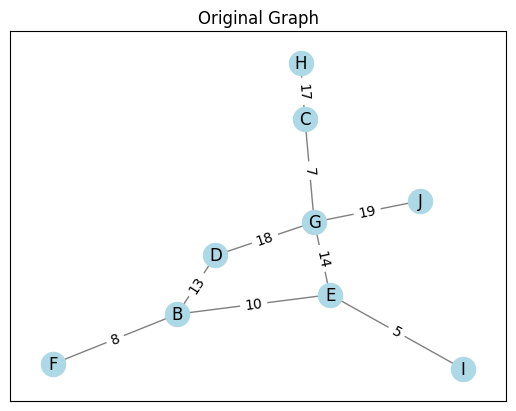

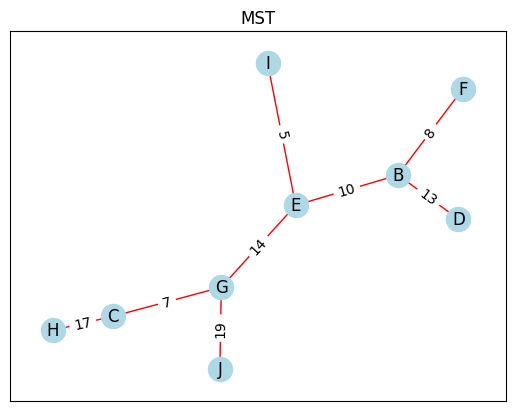

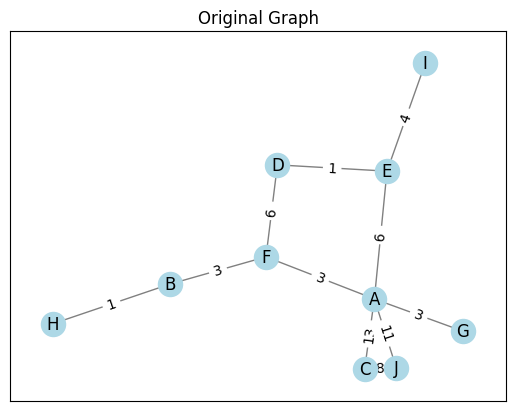

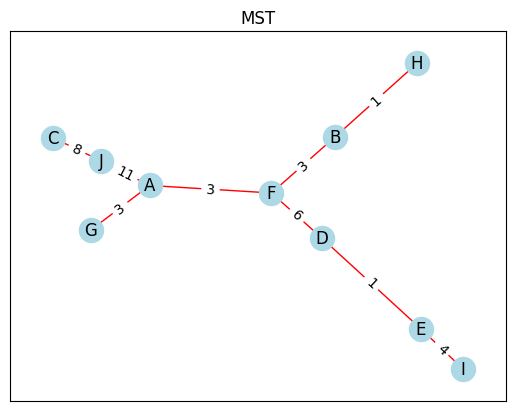

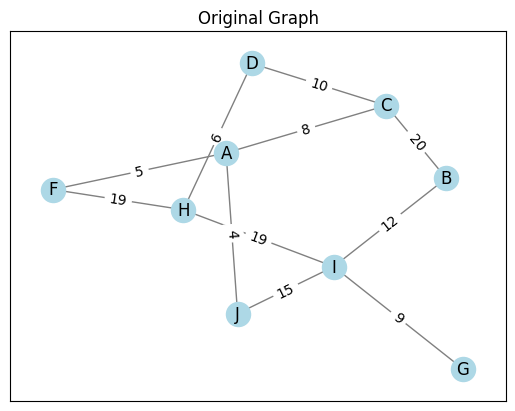

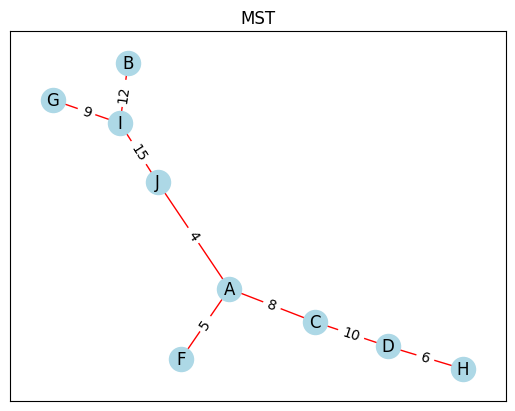

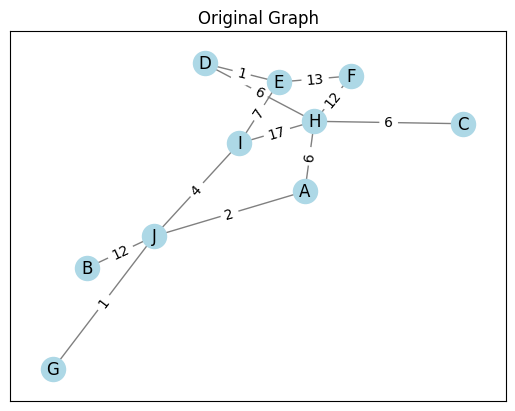

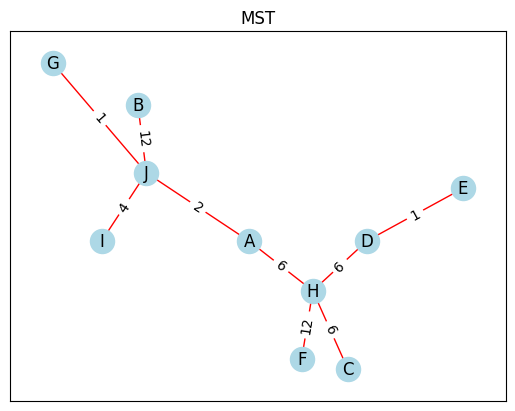

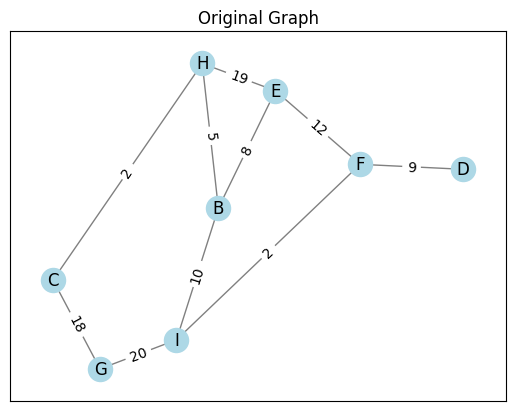

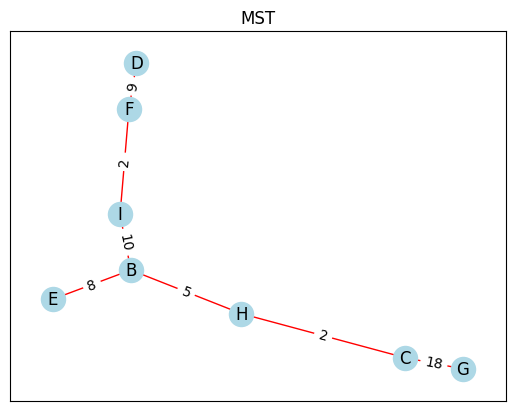

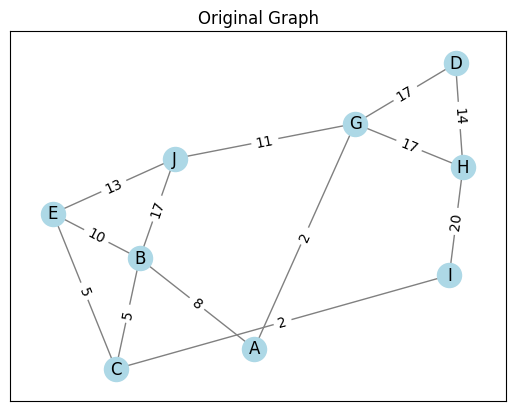

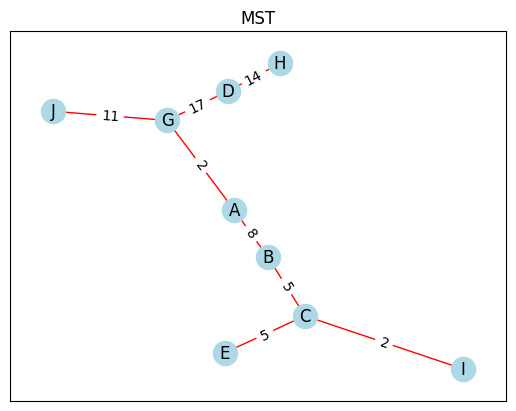

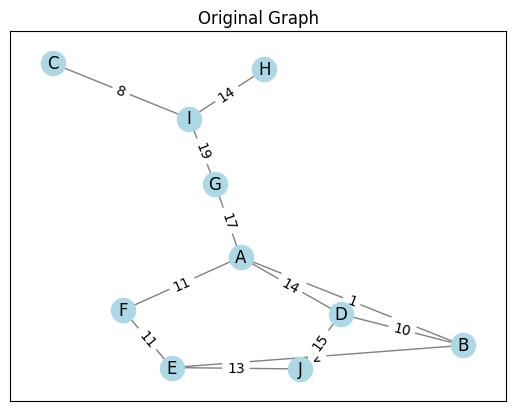

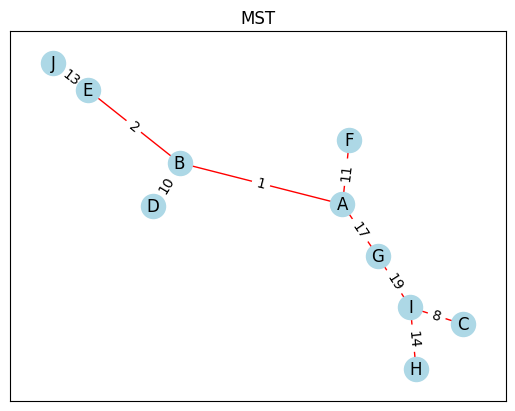

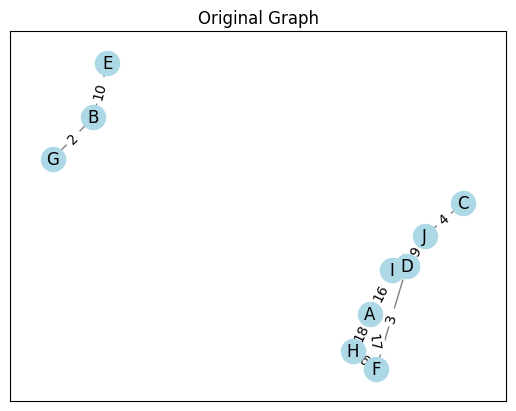

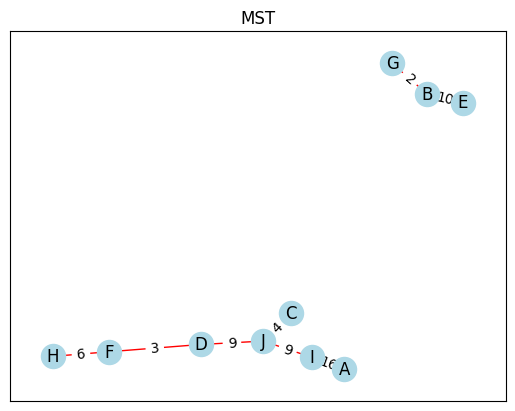

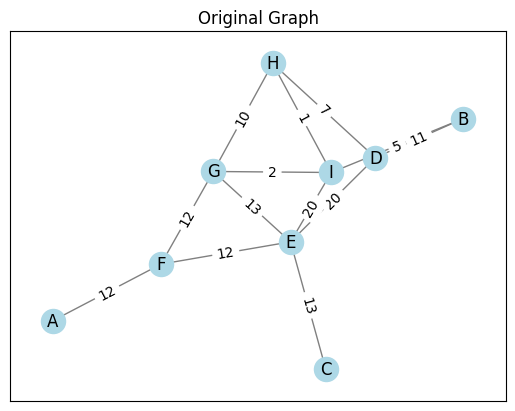

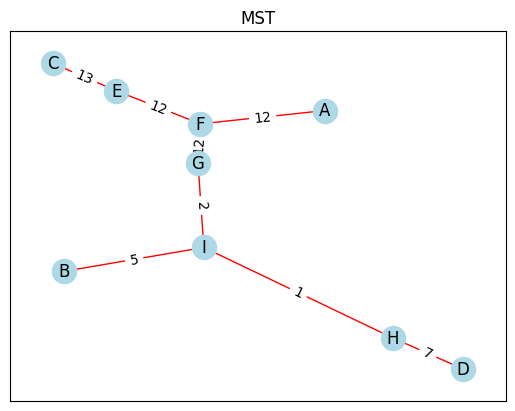

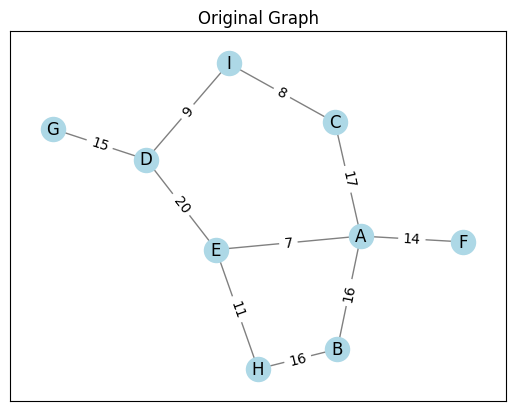

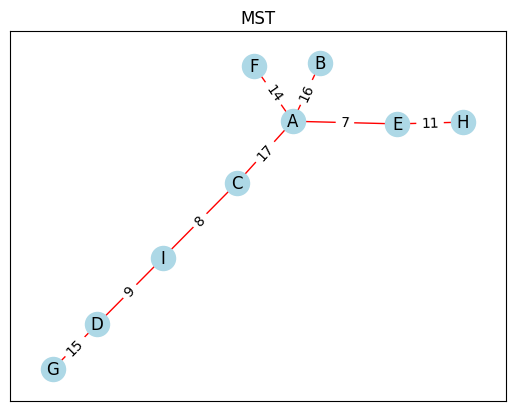

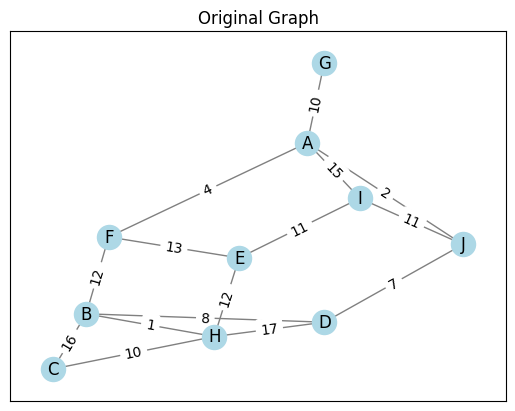

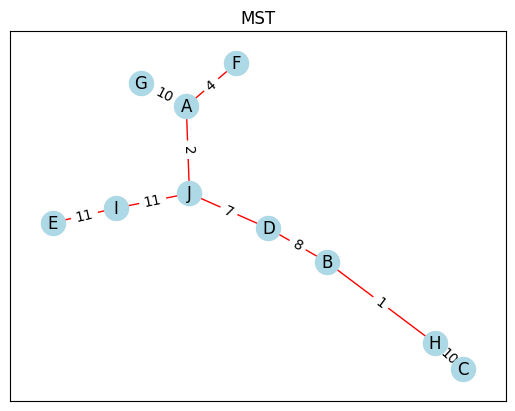

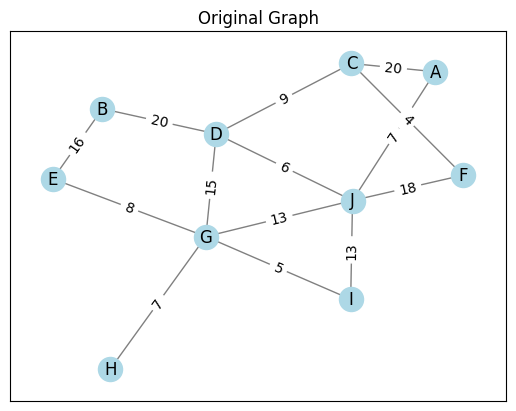

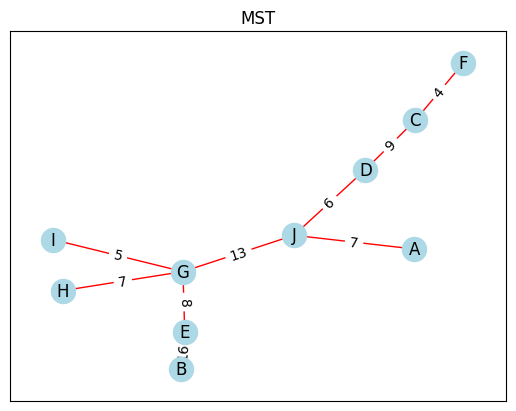

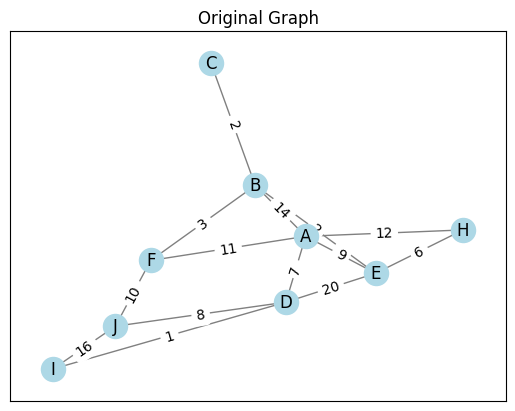

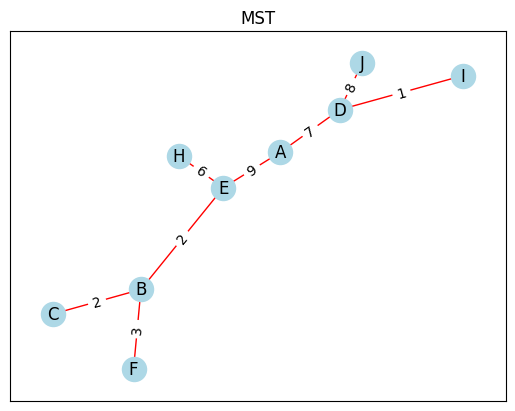

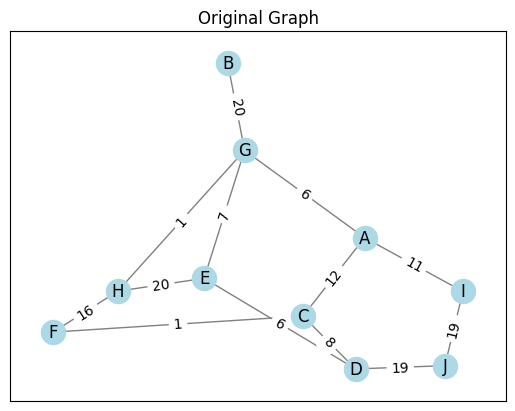

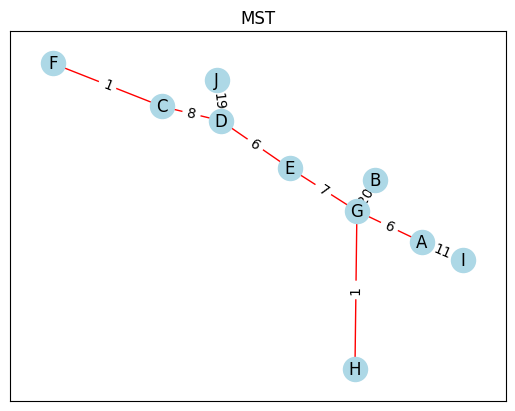

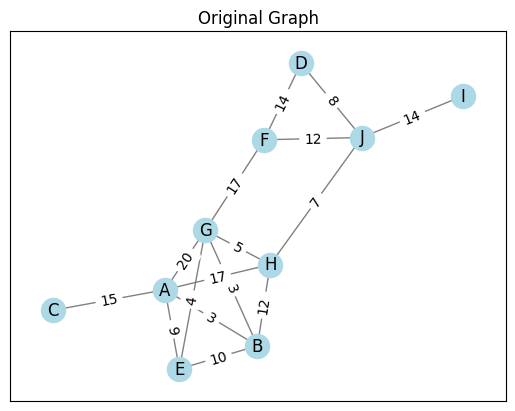

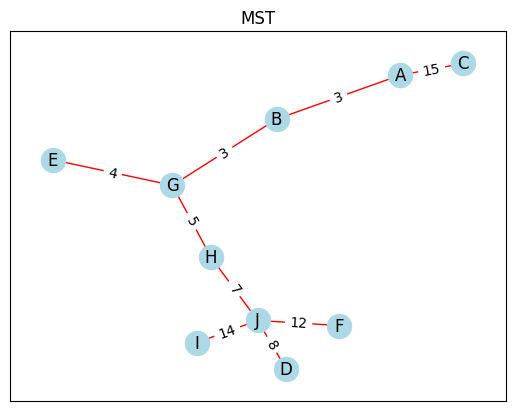

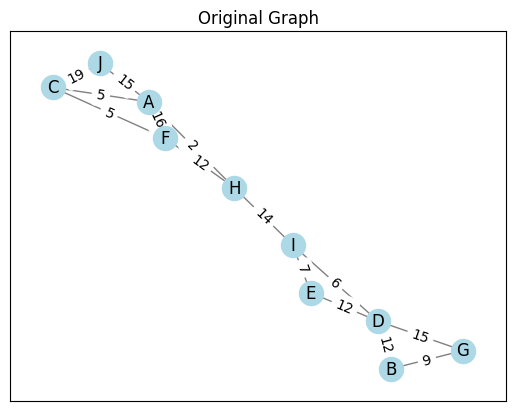

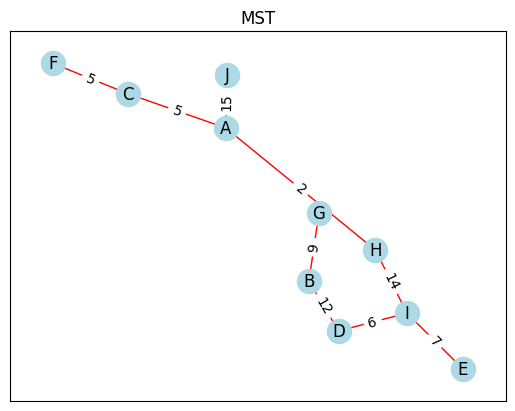

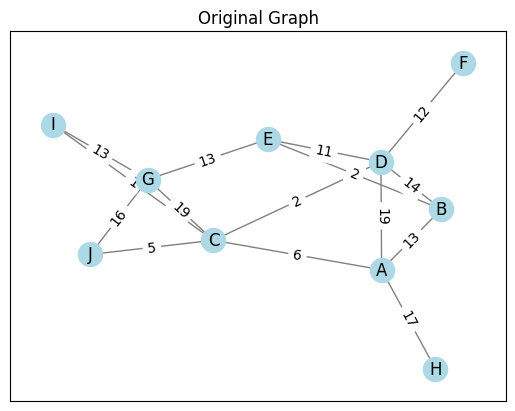

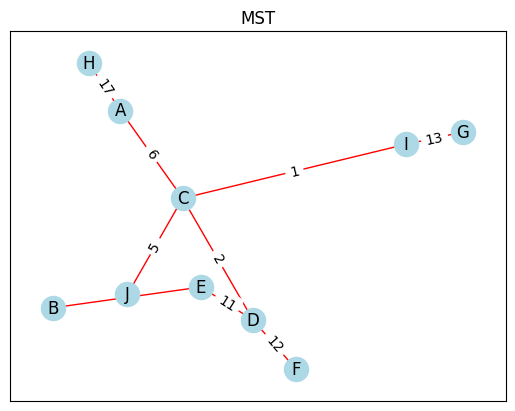

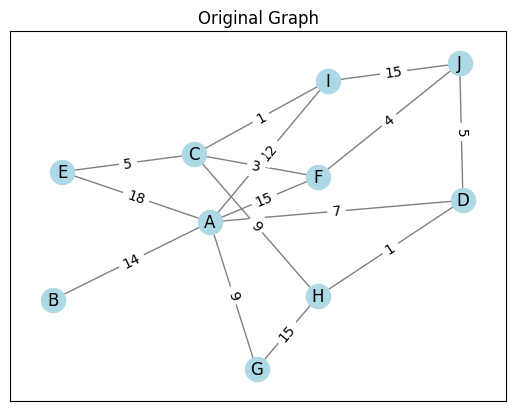

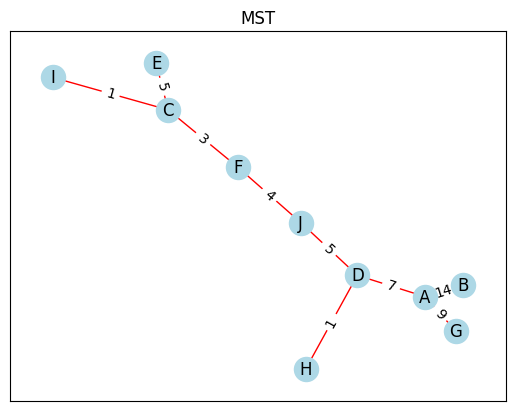

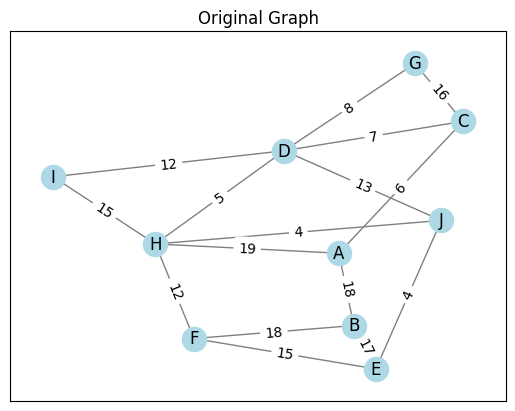

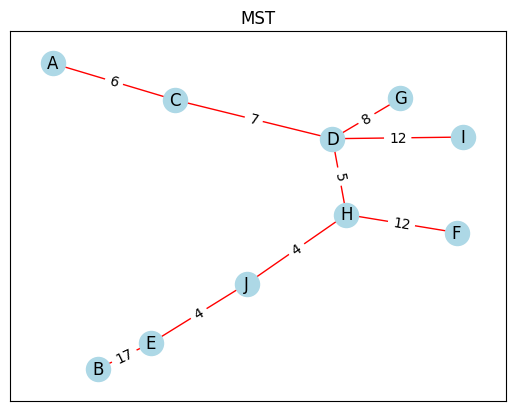

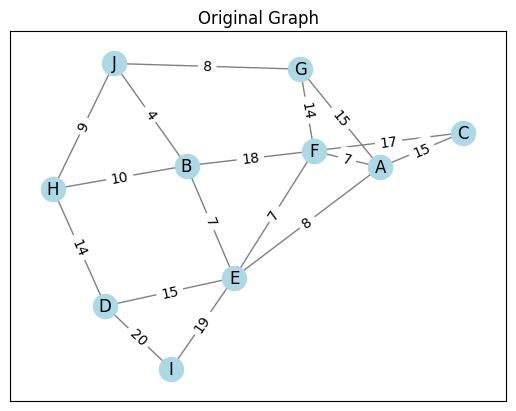

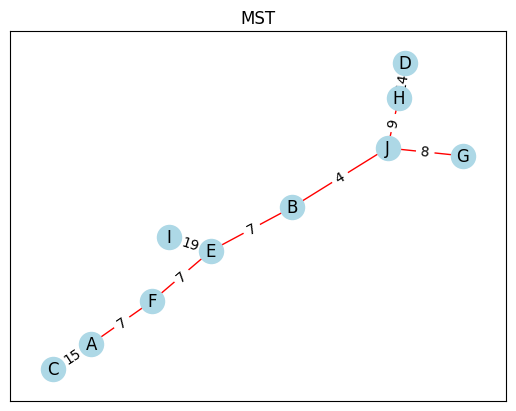

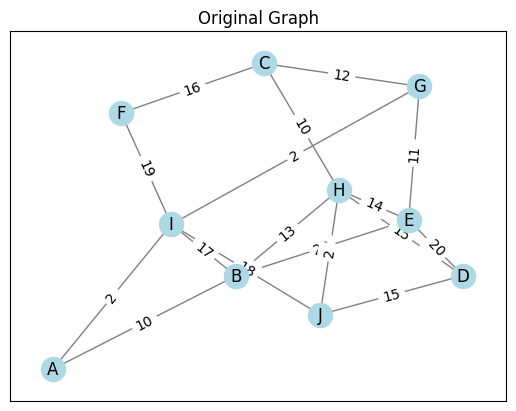

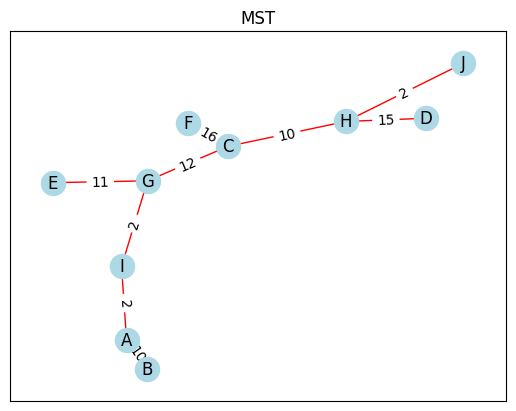

In [7]:
# Prim's algorithm
iterations = 100 # Number of iterations for running algorithm
sparse_p, dense_p = [], []
# Measure runtime for Prim's Algorithm
density = 0
for _ in range(iterations):
    # Example (Can be generated)
    g = Prims(10)
    num_vertices = 10
    density += 1/100
    num_edges = int(density * (num_vertices * (num_vertices - 1)) / 2)  # Calculate the number of edges based on density

    for i in range(num_vertices):  # Add vertices
        vertex_name = chr(i + 97).upper()
        g.add_vertex_data(i, vertex_name)

    if density < 0.5:  # Sparse graph
        edge_count = 0
        while edge_count < num_edges: 
            u = random.randint(0, num_vertices - 1)
            v = random.randint(0, num_vertices - 1)
            if u != v and g.edges.count((0, u, v)) == 0:  # Check if the edge is already present
                weight = random.randint(1, 20)
                g.add_edge(u, v, weight)
                edge_count += 1
        start_time = time.time()
        mst, total_weight = g.algorithm()
        eureka = g.output(mst, total_weight)        
        end_time = time.time()
        runtime = (end_time - start_time)*1000000000
        sparse_p.append({"Runtime_p": runtime, "Density": density})

    else:  # Dense graph
        all_edges = [(u, v) for u in range(num_vertices) for v in range(u + 1, num_vertices)]  # Generate all possible edges
        random.shuffle(all_edges)
        selected_edges = all_edges[:num_edges]  # Select the required number of edges
        for u, v in selected_edges:  # Add the edges
            weight = random.randint(1, 20)
            g.add_edge(u, v, weight)
        start_time = time.time()
        mst, total_weight = g.algorithm()
        eureka = g.output(mst, total_weight)     
        end_time = time.time()
        runtime = (end_time - start_time)*1000000000
        dense_p.append({"Runtime_p": runtime, "Density": density})

In [ ]:
# Kruskal's algorithm
iterations = 100 # Number of iterations for running algorithm
sparse_k, dense_k = [], []
# Measure runtime for Prim's Algorithm
density = 0
for _ in range(iterations):
    # Example (Can be generated)
    g = Kruskal(10)
    num_vertices = 10
    density += 1/100
    num_edges = int(density * (num_vertices * (num_vertices - 1)) / 2)  # Calculate the number of edges based on density

    for i in range(num_vertices):  # Add vertices
        vertex_name = chr(i + 97).upper()
        g.add_vertex_data(i, vertex_name)

    if density < 0.5:  # Sparse graph
        edge_count = 0
        while edge_count < num_edges: 
            u = random.randint(0, num_vertices - 1)
            v = random.randint(0, num_vertices - 1)
            if u != v and g.edges.count((0, u, v)) == 0:  # Check if the edge is already present
                weight = random.randint(1, 20)
                g.add_edge(u, v, weight)
                edge_count += 1
        start_time = time.time()
        mst, total_weight = g.algorithm()
        eureka = g.output(mst, total_weight)       
        end_time = time.time()
        runtime = (end_time - start_time)*1000000000
        sparse_k.append({"Runtime_k": runtime, "Density": density})
        
    else:  # Dense graph
        all_edges = [(u, v) for u in range(num_vertices) for v in range(u + 1, num_vertices)]  # Generate all possible edges
        random.shuffle(all_edges)
        selected_edges = all_edges[:num_edges]  # Select the required number of edges
        for u, v in selected_edges:  # Add the edges
            weight = random.randint(1, 20)
            g.add_edge(u, v, weight)
        start_time = time.time()
        mst, total_weight = g.algorithm()
        eureka = g.output(mst, total_weight)       
        end_time = time.time()
        runtime = (end_time - start_time)*1000000000
        dense_k.append({"Runtime_k": runtime, "Density": density})

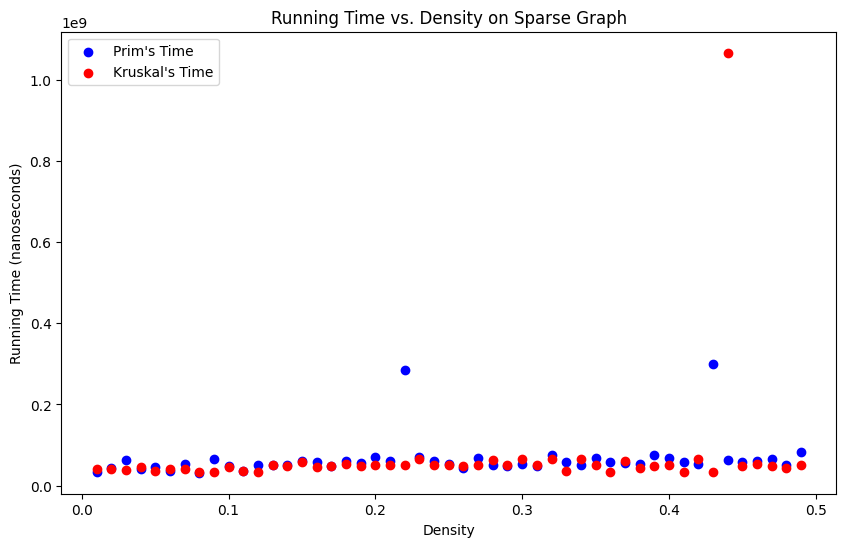

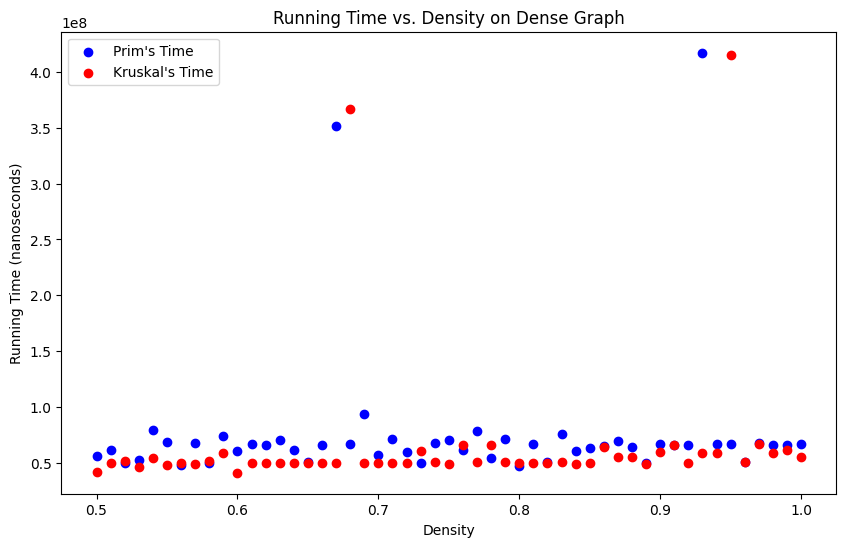

In [ ]:
df1 = pd.DataFrame(sparse_p)
df2 = pd.DataFrame(dense_p)
df3 = pd.DataFrame(sparse_k)
df4 = pd.DataFrame(dense_k)
df_sparse = pd.merge(df1, df3, on='Density')
df_dense = pd.merge(df2, df4, on='Density')

plt.figure(figsize=(10, 6))
plt.scatter(df_sparse['Density'], df_sparse['Runtime_p'], color='blue', label="Prim's Time")
plt.scatter(df_sparse['Density'], df_sparse['Runtime_k'], color='red', label="Kruskal's Time")
plt.title('Running Time vs. Density on Sparse Graph')
plt.xlabel('Density')
plt.ylabel('Running Time (nanoseconds)')
plt.legend()

plt.figure(figsize=(10, 6))
plt.scatter(df_dense['Density'], df_dense['Runtime_p'], color='blue', label="Prim's Time")
plt.scatter(df_dense['Density'], df_dense['Runtime_k'], color='red', label="Kruskal's Time")
plt.title('Running Time vs. Density on Dense Graph')
plt.xlabel('Density')
plt.ylabel('Running Time (nanoseconds)')
plt.legend()